# Pedersen Study

Analyze the performance of the model against the extreme downward refraction
N^2 linear test case developed by Pedersen and Gordon.  This is also the
test case that Weinberg and Keenan used to calibrate the minimum beam width
in GRAB. This test serves several important functions
- Compares the ray path locations, travel time, and D/E angles to analytic results.
- Compares the total propagation loss to analytic results.
- Analyzes the contribution of the phase change at the caustic.

The Pedersen/Gordon paper focuses two test cases.

- The shallow source portion analyzed an acoustic field for a downward
  refracting profile that had been fit to experimental velocity data.
  Propagation loss was studied in both the image interference zone
  and the shadow zone.
- The deep source test cases extended this analysis to a non-physical
  extreme that emphasizes the effects of the caustic.

Pedersen/Gordon concludes that the pi/2 phase change should only occur
when the ray path touches the caustic and not when the ray passes through
a horizontal vertex.  This is consistent with the current implementation
of GRAB, but different than the original Weinberg/Keenan paper.

Uses the MKS version of the parameters defined in Jensen et. al.
instead of the original yd/sec version defined by Pedersen.

- c0 = 1550 m/s, g0 = 1.2 1/s, f = 2000 Hz
- shallow:
    - source: depth = 75 m, time inc=0.025, cs = 1467.149925 m/s
    - target: depth = 75 m, range = 500-1000 m
- deep:
    - source: depth = 1000 m, time inc=0.1, cs = 970.954770 m/s
    - target: depth = 800 m, range = 3000-3100 m
 
 ---
 **Refefences:**
 * M. A. Pedersen, D. F. Gordon, "Normal-Mode and Ray Theory Applied
   to Underwater Acoustic conditions of Extreme Downward Refraction",
   J. Acoust. Soc. Am. 51 (1B), 323-368 (June 1972).
 * H. Weinberg, R. E. Keenan, “Gaussian ray bundles for modeling
   high-frequency propagation loss under shallow-water conditions”,
   J. Acoust. Soc. Am. 100 (3), 1421-1431, (Sept 1996).
 * L. M. Brekhovskikh, Waves in Layered Media, 2nd Edition,
   Academic Press Inc., 1980, Section 54.
 * F. B. Jensen, W. A. Kuperman, M. B. Porter, and H. Schmidt,
   Computational Ocean Acoustics (American Institute of Physics Press,
   New York, 1994) pp. 162-166.
 * Sean M. Reilly, Gopu R. Potty, "Verification Tests for Hybrid Gaussian Beams in Spherical/Time Coordinates",
   Department of Ocean Engineering, University of Rhode Island, 10 May 2012

# Setup path information

Setup USML path information assuming that this notebook is in usml/python/tests directory.

In [43]:
import sys
import os

USML_DIR = os.path.abspath("../..")
sys.path.append(os.path.join(USML_DIR, "python/src"))

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import usml.netcdf
import usml.plot
import usml.pedersen

# Shallow Source Raytrace

Illustrates the effects of downward refraction and surface reflection wavefront shapes. The colored lines below illustrate ray paths with launch angles from zero to 25 degrees upward, at a spacing of 1.0 degrees. Similar to Figure 3.6 in Jensen et. al. The critical ray for a source at 75.0 meters is 18.82 degrees and launch angles below this refract down before hitting the ocean surface. The black curve represents the acoustic wavefront shape for the travel time specified in the slider bar. The wavefront points are sampled at a 0.02 degrees and this causes the wavefront to stretch into the shadow zone slightly farther than the ray drawing. The surface reflection creates a fold in the wavefront. This creates a shadow zone near the ocean surface, but it does not create a caustic.

In [44]:
filename = os.path.join(USML_DIR, "studies/pedersen/pedersen_shallow_raytrace.nc")
wavefront = usml.netcdf.read(filename)
de_list = wavefront.source_de[::2]
de_direct = de_list[np.asarray(de_list < 18.82).nonzero()]
de_reflect = de_list[np.asarray(de_list >= 18.82).nonzero()]

tmin = wavefront.travel_time[0]
tmax = wavefront.travel_time[-1]
tinc = wavefront.travel_time[1] - wavefront.travel_time[0]


@interact
def shallow_raytrace(time=(tmin, tmax, tinc)):
    fig, ax = plt.subplots(figsize=(8, 6))
    usml.plot.plot_raytrace_2d(ax, wavefront, de=de_direct)
    usml.plot.plot_raytrace_2d(ax, wavefront, de=de_reflect, fmt="--")
    usml.plot.plot_wavefront_2d(ax, wavefront, time=time, fmt="k-")
    ax.grid(True)
    ax.set_xlabel('Range (km)')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(0, 1.2)
    ax.set_ylim(-500, 0);

interactive(children=(FloatSlider(value=0.42, description='time', max=0.8500000000000005, step=0.01), Output()…

# Deep Source Raytrace

Illustrates the effect of caustic on wavefront folds. The colored lines below illustrate ray paths with launch angles from 20 to 60 degrees upward, at a spacing of 10 degrees. The critical ray for a source at 1000.0 meters is 51.21 degrees and launch angles below this refract down before hitting the ocean surface. The black curve represents the acoustic wavefront shape for the travel time specified in the slider bar. The wavefront points are sampled at a 0.2 degrees and this causes the wavefront to stretch into the shadow zone slightly farther than the ray drawing. The surface reflection creates a fold in the wavefront. This creates a shadow zone near the ocean surface. At times greater than about 2.5 seconds, there is a caustic in the direct path.  So points on trailing side of the wavefront fold can have different numbers of surface reflections.

In [45]:
filename = os.path.join(USML_DIR, "studies/pedersen/pedersen_deep_raytrace.nc")
wavefront = usml.netcdf.read(filename)

de_list = wavefront.source_de[::1]
de_direct = de_list[np.asarray(de_list < 51.21).nonzero()]
de_reflect = de_list[np.asarray(de_list >= 51.21).nonzero()]

tmin = wavefront.travel_time[0]
tmax = wavefront.travel_time[-1]
tinc = wavefront.travel_time[1] - wavefront.travel_time[0]


@interact
def deep_raytrace(time=(tmin, tmax, tinc)):
    fig, ax = plt.subplots(figsize=(8, 6))
    usml.plot.plot_raytrace_2d(ax, wavefront, de=de_direct)
    usml.plot.plot_raytrace_2d(ax, wavefront, de=de_reflect, fmt="--")
    usml.plot.plot_wavefront_2d(ax, wavefront, time=time, fmt="k-")
    ax.grid(True)
    ax.set_xlabel('Range (km)')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(0, 3.5)
    ax.set_ylim(-1200, 0);

interactive(children=(FloatSlider(value=1.75, description='time', max=3.509999999999969, step=0.01), Output())…

# Analytic Model for Eigenrays in $n^2$ Linear Environment

Analytic solution for the ray paths of the Pedersen profile in a Spherical coordinate system. The Pedersen profile is an extreme test case for a downward refracting $n^2$ linear profile.

$$
c(r) = \left[ \frac{c_0}{ \sqrt{ \frac{ 1 + 2 g_0 \left( R - r \right) }{c_0} } } \right] \frac{r}{R}
$$

where:
* $R$ = Earth radius of curvature
* $r$ = radial component of position (positive is up)
* $c_0$ = sound speed at the ocean surface
* $g_0$ = sound speed gradient at at the ocean surface

A "flat Earth" correction has been applied to the speed profile to simplify comparisons to the Cartesian coordinate system.

The range from the source to the first vertex is computed by integrating the equation for $\frac{d\theta}{dr}$ using Snell's law for spherical media and SciPy's Gaussian quadrature numerical integration.

$$
r \frac{d\theta}{dr} = cot(\mu) = \frac{ac}{\sqrt{1 - (ac)^2} }
$$

$$
a = \frac{r_s cos(\mu_s)}{c(r_s)}
$$

where:

* $\theta$ = latitude component of position (positive is south)
* $\mu$ = depression/elevation angle at each r (positive is up)
* $\mu_s$ = launch angle (positive is up)
* $c(r_s)$ = sound speed at source depth
* $a$ = ray parameter (constant for each launch angle)

In [46]:
def plot_pedersen(grab, wq3d, analytic):
    # remove bulk travel time
    slope = np.mean(analytic.travel_time) / np.mean(analytic.horz_range)
    grab.travel_time -= slope * grab.horz_range
    # print(f"{wq3d.travel_time.shape} {wq3d.horz_range.shape}")
    wq3d.travel_time -= slope * wq3d.horz_range
    analytic.travel_time -= slope * analytic.horz_range

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6), layout="constrained")

    ax1.plot(grab.horz_range / 1e3, grab.level)
    ax1.plot(wq3d.horz_range / 1e3, wq3d.level, "--")
    ax1.grid(True)
    ax1.set_ylabel("Propagation Loss (dB)")

    ax2.plot(grab.horz_range / 1e3, grab.travel_time * 1e3)
    ax2.plot(wq3d.horz_range / 1e3, wq3d.travel_time * 1e3, "--")
    ax2.plot(analytic.horz_range / 1e3, analytic.travel_time * 1e3, ":", linewidth=3.0)
    ax2.grid(True)
    ax2.set_ylabel("Travel Time - Bulk (msec)")

    ax3.plot(grab.horz_range / 1e3, grab.source_de)
    ax3.plot(wq3d.horz_range / 1e3, wq3d.source_de, "--")
    ax3.plot(analytic.horz_range / 1e3, analytic.source_de, ":", linewidth=3.0)
    ax3.grid(True)
    ax3.set_xlabel("Target Range (km)")
    ax3.set_ylabel("Source D/E (deg)")

    ax4.plot(grab.horz_range / 1e3, grab.target_de)
    ax4.plot(wq3d.horz_range / 1e3, wq3d.target_de, "--")
    ax4.plot(analytic.horz_range / 1e3, analytic.target_de, ":", linewidth=3.0)
    ax4.grid(True)
    ax4.set_xlabel("Target Range (km)")
    ax4.set_ylabel("Target D/E (deg)")
    ax4.legend(["CASS/GRAB", "USML/WaveQ3D", "Analytic"])

    return ax1, ax2, ax3, ax4

In [47]:
class Eigenrays:
    pass


def grab_eigenrays(filename: str, srf: int, btm: int, upr: int, lwr: int, phase=None):
    model = np.loadtxt(filename)
    model_phase = model[:, 5]
    model_srf = model[:, 6]
    model_btm = model[:, 7]
    model_upr = model[:, 8]
    model_lwr = model[:, 9]

    index = np.logical_and(model_srf == srf, model_btm == btm)
    index = np.logical_and(index, model_upr == upr)
    index = np.logical_and(index, model_lwr == lwr)
    if phase is not None:
        index = np.logical_and(index, model_phase == phase)

    rays = Eigenrays()
    rays.horz_range = model[index, 0] * 1e3
    rays.travel_time = model[index, 1]
    rays.source_de = -model[index, 2]
    rays.target_de = -model[index, 3]
    rays.level = model[index, 4]
    rays.phase = model[index, 5]
    return rays

In [48]:
def wq3d_eigenrays(filename: str, srf: int, btm: int, upr: int, lwr: int, phase=None):
    model = usml.netcdf.EigenrayList(filename)

    earth_radius = 6366.71e3
    rays = Eigenrays()
    rays.horz_range = list()
    rays.travel_time = list()
    rays.source_de = list()
    rays.target_de = list()
    rays.level = list()
    rays.phase = list()

    for target_list in model.eigenrays:
        for target in target_list:
            for n in range(len(target.bottom)):
                model_phase = np.round(np.degrees(target.phase.item(n)))
                model_srf = target.surface.item(n)
                model_btm = target.bottom.item(n)
                model_upr = target.upper.item(n)
                model_lwr = target.lower.item(n)
                # print(f"t={target.travel_time.item(n)} l={target.intensity.item(n)} p={target.intensity.item(n)} p={model_phase} s={model_srf} b={model_btm} u={model_upr} l={model_lwr}")

                ok = model_srf == srf and model_btm == btm
                ok = ok and model_upr == upr and model_lwr == lwr
                if phase is not None:
                    ok = ok and model_phase == phase

                if ok:
                    rays.travel_time.append(target.travel_time.item(n))
                    rays.source_de.append(target.source_de.item(n))
                    rays.target_de.append(target.target_de.item(n))
                    rays.level.append(-target.intensity.item(n))
                    rays.phase.append(model_phase)

    rays.horz_range = np.radians(model.latitude[:, 0] - model.source_latitude) * earth_radius
    rays.travel_time = np.asarray(rays.travel_time)
    rays.source_de = np.asarray(rays.source_de)
    rays.target_de = np.asarray(rays.target_de)
    rays.level = np.asarray(rays.level)
    rays.phase = np.asarray(rays.phase)

    return rays

# Shallow Source Eigenrays

Tests the accuracy of the CASS/GRAB and USML/WaveQ3D models acoustic propagation models against the analytic solution for the shallow source, $n^2$ linear test case developed by Pedersen and Gordon. The source is located at a depth of 75 meters. Receivers have a depth of 75 meters and ranges from 500 to 1000 meters. Uses rays from 0 to 30 degrees at a very a tight 0.025 deg spacing.  Such tight spacing is needed to capture the portion of the surface reflected path just inside of the critical ray. These parameters tests the model's ability to produce accurate propagation loss, phase, travel times, and eigneray angles at the edge of a shadow zone. 

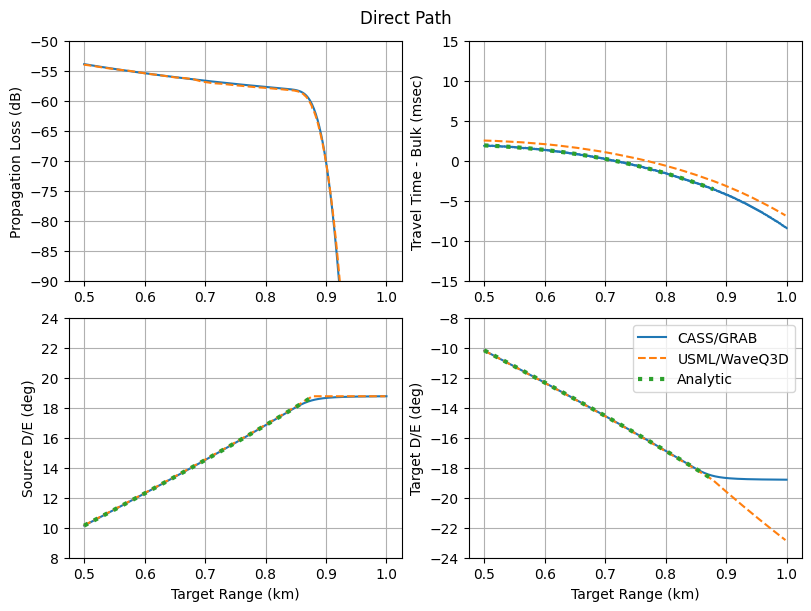

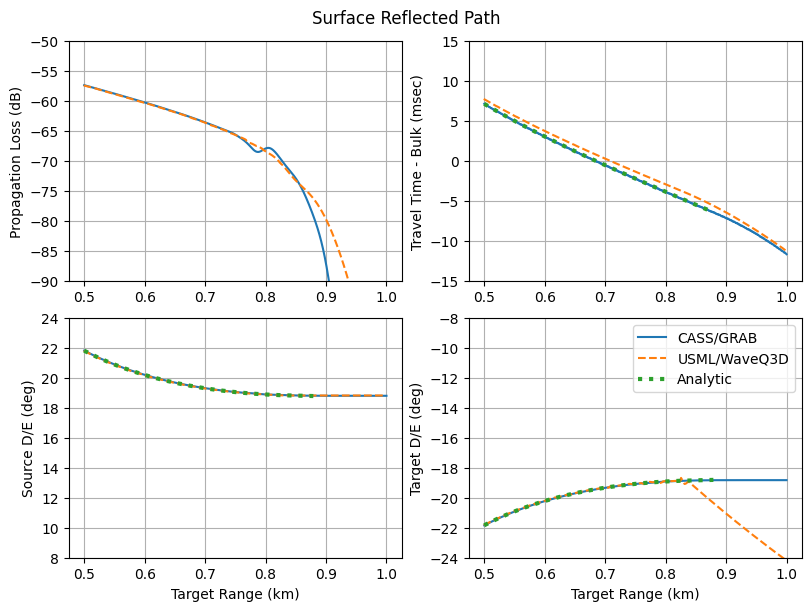

In [49]:
source_depth = 75.0
target_depth = 75.0
source_angles = np.arange(1.0, 25.0, 0.025)
target_ranges = np.arange(500.0, 1000.0, 1.0)

analytic = usml.pedersen.PedersenCartesian();
analytic_direct, analytic_folded = analytic.eigenrays(source_depth, source_angles, target_depth, target_ranges)

filename = os.path.join(USML_DIR, "studies/pedersen/grab_eigenrays_shallow.txt")
grab_direct = grab_eigenrays(filename, 0, 0, 1, 0)
grab_folded = grab_eigenrays(filename, 1, 0, 0, 0)

filename = os.path.join(USML_DIR, "studies/pedersen/pedersen_shallow_proploss.nc")
wq3d_direct = wq3d_eigenrays(filename, 0, 0, 1, 0, 0.0)
wq3d_folded = wq3d_eigenrays(filename, 1, 0, 0, 0)

ax1, ax2, ax3, ax4 = plot_pedersen(grab_direct, wq3d_direct, analytic_direct)
ax1.set_ylim(-90, -50)
ax2.set_ylim(-15, 15)
ax3.set_ylim(8, 24)
ax4.set_ylim(-24, -8)
plt.suptitle("Direct Path")

ax1, ax2, ax3, ax4 = plot_pedersen(grab_folded, wq3d_folded, analytic_folded)
ax1.set_ylim(-90, -50)
ax2.set_ylim(-15, 15)
ax3.set_ylim(8.0, 24.0)
ax4.set_ylim(-24, -8)
plt.suptitle("Surface Reflected Path");

# Deep Source Eigenrays

Tests the accuracy of the CASS/GRAB and USML/WaveQ3D models acoustic propagation models against the analytic solution for the deep source, $n^2$ linear test case developed by Pedersen and Gordon. The source is located at a depth of 1000 meters. Receivers have a depth of 800 meters and ranges from 3000 to 3120 meters. Uses rays from 20 to 60 degrees at a 0.025 deg spacing. Tests the model's ability to produce accurate propagation loss, phase, travel times, and eigneray angles in an area where a caustic causes rays to cross at the edge of a shadow zone.

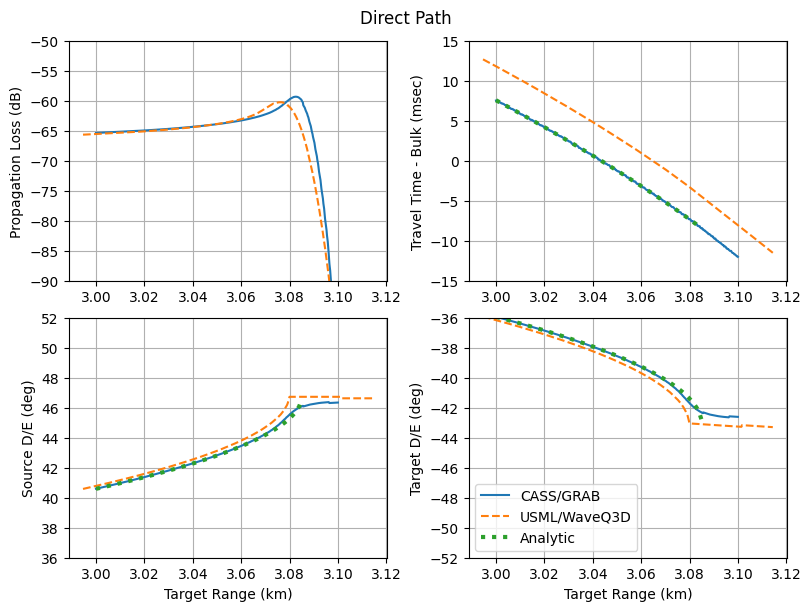

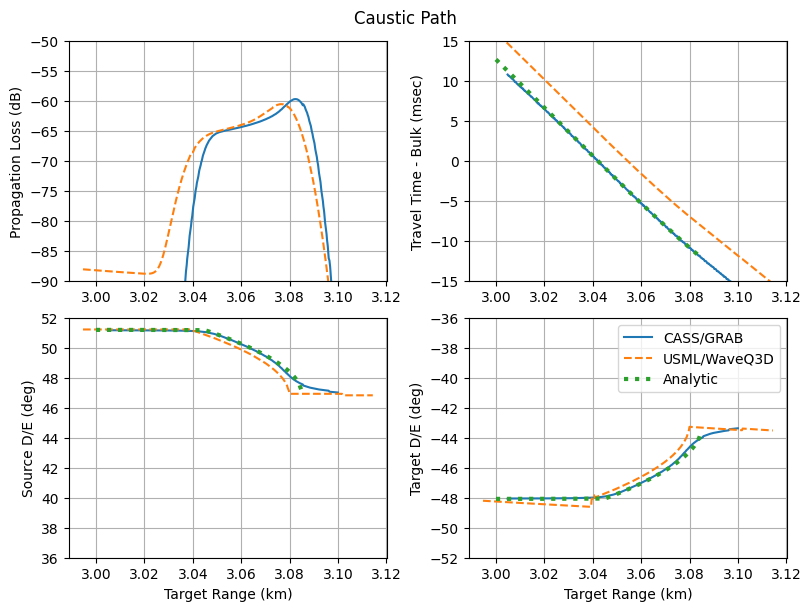

In [50]:
source_depth = 1000.0
target_depth = 800.0
source_angles = np.arange(20.0, 60.0, 0.025)
target_ranges = np.arange(3000.0, 3120.0, 1.0)

analytic = usml.pedersen.PedersenCartesian();
analytic_direct, analytic_folded = analytic.eigenrays(source_depth, source_angles, target_depth, target_ranges)

filename = os.path.join(USML_DIR, "studies/pedersen/grab_eigenrays_deep.txt")
grab_direct = grab_eigenrays(filename, 0, 0, 1, 0, 0.0)
grab_folded = grab_eigenrays(filename, 0, 0, 1, 0, -90.0)

filename = os.path.join(USML_DIR, "studies/pedersen/pedersen_deep_proploss.nc")
wq3d_direct = wq3d_eigenrays(filename, 0, 0, 1, 0, 0.0)
wq3d_folded = wq3d_eigenrays(filename, 0, 0, 1, 0, -90.0)

ax1, ax2, ax3, ax4 = plot_pedersen(grab_direct, wq3d_direct, analytic_direct)
ax1.set_ylim(-90, -50)
ax2.set_ylim(-15, 15)
ax3.set_ylim(36, 52)
ax4.set_ylim(-52, -36)
plt.suptitle("Direct Path")

ax1, ax2, ax3, ax4 = plot_pedersen(grab_folded, wq3d_folded, analytic_folded)
ax1.set_ylim(-90, -50)
ax2.set_ylim(-15, 15)
ax3.set_ylim(36, 52)
ax4.set_ylim(-52, -36)
plt.suptitle("Caustic Path");